## Question 1: OR Gate Neural Network

Calculate the output of the network (via forward propagation) given an input of $[1, 0]$.

Answer:

We have:  
- Input: $\mathbf{x} = [1, 0]$  
- Hidden Layer Weights ($\mathbf{H_1}$):

  $
  H_1 =
  \begin{bmatrix}
  1 & 0 & 1 & 0 \\
  0 & 1 & 0 & 1
  \end{bmatrix}
  $
- Hidden Layer Bias ($\mathbf{B_1}$):

  $
  B_1 =
  \begin{bmatrix} 0.15 & 0.15 & 0.15 & 0.15 \end{bmatrix}
  $
- Output Layer Weights ($\mathbf{H_2}$):

  $
  H_2 =
  \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix}
  $
- Output Layer Bias ($\mathbf{B_2}$):

  $
  B_2 = 0
  $

As the hidden layer activation function is tanh, and the hidden layer output is computed as:

$
\mathbf{A1} = H_1 \cdot \mathbf{x} + B_1
$

$
\mathbf{A1} =
\begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1
\end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix} + \begin{bmatrix} 0.15 & 0.15 & 0.15 & 0.15 \end{bmatrix}
$

$
= \begin{bmatrix} 1 + 0 + 0.15 & 0 + 0 + 0.15 & 1 + 0 + 0.15 & 0 + 0 + 0.15 \end{bmatrix} = \begin{bmatrix} 1.15 & 0.15 & 1.15 & 0.15 \end{bmatrix}
$

Applying the tanh activation function:

$
h = \tanh(A1) = \begin{bmatrix} \tanh(1.15) & \tanh(0.15) & \tanh(1.15) & \tanh(0.15) \end{bmatrix}
$

Approximating:

$
\tanh(1.15) \approx 0.818, \quad \tanh(0.15) \approx 0.149
$

$
h = \begin{bmatrix} 0.818 & 0.149 & 0.818 & 0.149 \end{bmatrix}
$

Now, computing the output layer:

$
A2 = H_2 \cdot h + B_2
$

$
A2 =
\begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix}
\begin{bmatrix} 0.818 & 0.149 & 0.818 & 0.149 \end{bmatrix} + 0
$

$
= (1 \times 0.818) + (1 \times 0.149) + (0 \times 0.818) + (1.5 \times 0.149)
$

$
= 0.818 + 0.149 + 0 + 0.223 = 1.19
$

Applying tanh activation:

$
\tanh(1.19) \approx 0.831
$

So, the final output is:

$
\mathbf{A2} = 0.831
$

So, now updating weights using Gradient Descent:
We are given, Target Output: $ t = 1 $  and Error (MSE Loss Derivative):

$
E = (y - t)^2
$

$
\frac{dE}{dy} = 2 (y - t) = 2 (0.831 - 1) = -0.338
$

However, since $ y $ has a tanh activation, we apply the chain rule:

$
\frac{dy}{dA2} = 1 - \tanh^2(A2)
$

Since:

$
\tanh(1.191) \approx 0.831
$

$
1 - \tanh^2(1.191) = 1 - (0.831)^2 = 1 - 0.691 = 0.309
$

Now, applying the chain rule:

$
\frac{dE}{dA2} = \frac{dE}{dy} \cdot \frac{dy}{dA2}
$

$
= (-0.338) \times (0.309) = -0.104
$


Update Rules (Gradient Descent with Learning Rate = 10):

$
\frac{dE}{dH_2} = \frac{dE}{dA2} \cdot h
$

$
\frac{dE}{dB_2} = \frac{dE}{dA2}
$

$
\frac{dE}{dH_2} = (-0.104) \times
\begin{bmatrix} 0.818 & 0.149 & 0.818 & 0.149 \end{bmatrix} =
\begin{bmatrix} -0.085 & -0.015 & -0.085 & -0.015 \end{bmatrix}
$

$
\frac{dE}{dB_2} = -0.104
$

Using the learning rate $ \eta = 10 $:

$
H_2' = H_2 - \eta \times \frac{dE}{dH_2}
$

$
B_2' = B_2 - \eta \times \frac{dE}{dB_2}
$

Updating $ H_2 $:

$
H_2' =
\begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix} -
10 \times
\begin{bmatrix} -0.085 & -0.015 & -0.085 & -0.015 \end{bmatrix}
$

$
= \begin{bmatrix} 1 & 1 & 0 & 1.5 \end{bmatrix} + \begin{bmatrix} 0.85 & 0.15 & 0.85 & 0.15 \end{bmatrix}
$

$
= \begin{bmatrix} 1.85 & 1.15 & 0.85 & 1.65 \end{bmatrix}
$

Updating $ B_2 $:

$
B_2' = 0 - 10 \times (-0.104) = 1.04
$

Now, Final Updated Values are
$
H_2 = \begin{bmatrix} 1.85 & 1.15 & 0.85 & 1.65 \end{bmatrix}, \quad B_2 = 1.04
$


In [1]:
import numpy as np

# Weights and Bias for both layers (Hidden and Output)
H1 = np.array([[1, 0, 1, 0], [0, 1, 0, 1]])
B1 = np.array([0.15, 0.15, 0.15, 0.15])
H2 = np.array([1, 1, 0, 1.5])
B2 = 0

# Here x is the given input data, target is the required output and lr is the learning rate
x = np.array([1, 0])
target = 1
lr = 10

# Implementation of both tanh and tanh Derivative is below
def tanh(x):
    z = np.tanh(x)
    return z

def tanDer(x):
    zprime = 1 - np.tanh(x) ** 2
    return zprime

# Now I will be calculating the output of hidden layer and the output layer - y is the output predicted
A1 = np.dot(x, H1) + B1
h = tanh(A1)

A2 = np.dot(H2, h) + B2
y = tanh(A2)

# Now I will compute the gradients and use the chain rule and backpropagate
# The below is the gradient of error function (MSE)
dEdy = 2 * (y - target)
dydA2 = tanDer(A2)

# Now finding the gradient for the input of the output layer using the output error of the output layer
dEdA2 = dEdy * dydA2

# Now finding gradient with respect to the weights and bias
dEdH2 = dEdA2 * h
dEdB2 = dEdA2

# Finally updating H2 and B2 (Weights and Bias of the output layer)
H2new = H2 - lr * dEdH2
B2new = B2 - lr * dEdB2

print("Forward Propagation Output (y):", y)
print("Gradient of H2:", dEdH2)
print("Gradient of B2:", dEdB2)
print("Updated H2:", H2new)
print("Updated B2:", B2new)

Forward Propagation Output (y): 0.8305685288556741
Gradient of H2: [-0.08594624 -0.01564787 -0.08594624 -0.01564787]
Gradient of B2: -0.10510034723806064
Updated H2: [1.85946238 1.15647869 0.85946238 1.65647869]
Updated B2: 1.0510034723806063


### Question 2: Coding and Testing a Neural Network

I implemented the Layer, FCLayer, ActivationLayer, and Network classes following the approach outlined in the question. The weights and bias can either be explicitly set as demonstrated in the test functions or Xavier initialized to prevent exploding or vanishing gradients.

Apart from the basic classes, I included two more classes to select an appropriate loss function based on the output classes automatically. However, the users can specify a custom loss function manually, as seen in the testingNN and testingStress functions.

The code is also reusable in the sense that users can construct any simple neural network architecture with various activation and loss functions provided that they are incorporated within the code. Modular functions are applied in the sense that they can be tested independently, and values can be manually set in order to test them in a controlled environment. For ease of reading and maintenance, I included a lot of comments within the code.

Forward Output:
[[2 1 1]]
Updated Weights after Backpropagation:
[[ 9.980e-01  1.000e-03  9.995e-01]
 [-2.000e-03  1.001e+00 -5.000e-04]]
Updated Biases after Backpropagation:
[[ 9.98e-01  1.00e-03 -5.00e-04]]
Sigmoid Activation Forward Output:
[[0.62245933 0.37754067]
 [0.81757448 0.92414182]]
[[ 0.01175019 -0.00470007]
 [ 0.01491465  0.00350519]]
Backpropagation completed. Gradients applied.
Training on XOR Function:
Epoch 0, Train Loss: 0.6954743536405679, Validation Loss: 0.6849436720607741
Epoch 100, Train Loss: 0.16845850016646624, Validation Loss: 0.18296687398209155
Epoch 200, Train Loss: 0.05170702020425154, Validation Loss: 0.06059977097345672
Epoch 300, Train Loss: 0.028944688433722263, Validation Loss: 0.03481612391059583
Epoch 400, Train Loss: 0.019893936184996686, Validation Loss: 0.02425763300686692
Epoch 500, Train Loss: 0.01510348960334612, Validation Loss: 0.018576724302997536
Epoch 600, Train Loss: 0.01215421594256923, Validation Loss: 0.015041151112618889
Epoch 700,

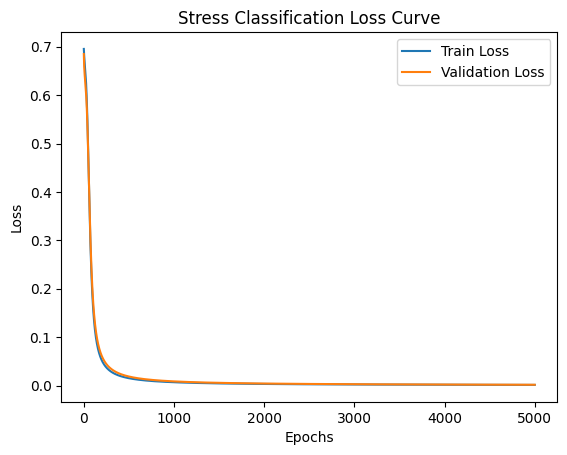

Predictions for XOR:

Training on Stress Classification:
Epoch 0, Train Loss: 0.3567087181576614, Validation Loss: 0.42751056349451183
Epoch 100, Train Loss: 0.056698221048161135, Validation Loss: 0.056014677564497344
Epoch 200, Train Loss: 0.022578758103681915, Validation Loss: 0.022452181497249608
Epoch 300, Train Loss: 0.013410119590476359, Validation Loss: 0.01336558909317236
Epoch 400, Train Loss: 0.00937844605086265, Validation Loss: 0.009357761786793144
Epoch 500, Train Loss: 0.007154582546777883, Validation Loss: 0.0071434625937550015
Epoch 600, Train Loss: 0.005758348514618584, Validation Loss: 0.005751841657924639
Epoch 700, Train Loss: 0.004805291544336723, Validation Loss: 0.004801290021690749
Epoch 800, Train Loss: 0.004115629155642201, Validation Loss: 0.004113104756527665
Epoch 900, Train Loss: 0.003594614373447489, Validation Loss: 0.0035930144739315054
Epoch 1000, Train Loss: 0.0031877873681973898, Validation Loss: 0.003186792657374773
Epoch 1100, Train Loss: 0.0028617

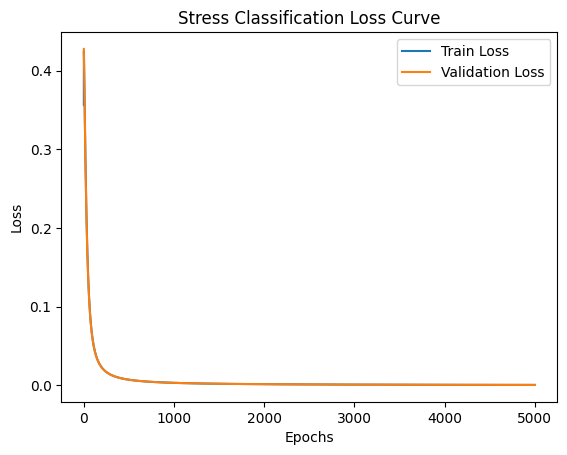

Predictions for Stress Classification:
Test Data for XOR Network:
[[0 1]
 [1 0]
 [1 1]] [[1]
 [1]
 [0]] [[1]
 [1]
 [0]]

Test Data for Stress Classification:
[[ 60.82241993  50.82241993]
 [ 60.71791889  50.71791889]
 [120.77169871  32.15145738]
 [ 59.74133885  49.74133885]
 [119.16027816  34.40060735]
 [ 59.63238016  49.63238016]
 [119.44635069  33.80212211]
 [ 59.96597259  49.96597259]
 [121.03184454  33.51443963]
 [118.62809886  33.3864386 ]
 [ 59.34502442  49.34502442]
 [120.70775194  34.43753322]
 [ 59.53345469  49.53345469]
 [ 58.99255603  48.99255603]
 [118.30753537  36.52955032]
 [119.12201741  34.17311965]
 [ 61.77858758  51.77858758]
 [ 59.13084394  49.13084394]
 [ 61.08724594  51.08724594]
 [ 59.81482446  49.81482446]
 [118.8086965   35.65655361]
 [120.61277391  33.94658444]
 [ 59.42794256  49.42794256]
 [120.28328787  34.74109503]
 [120.20292302  33.48425589]
 [ 59.48470568  49.48470568]
 [ 60.47004215  50.47004215]
 [119.9803622   35.55248995]
 [119.31184965  37.25243581]
 

In [2]:
import matplotlib.pyplot as plt
from nnet import Network, FCLayer, ActivationLayer
import numpy as np

np.random.seed(42)

# The function sigtobinary is sigmoid to binary conversion function
def sigtobinary(output):
    n = (output > 0.5).astype(int)
    return n

# The function testingFCLayer is testing the forward and backward propagation function
def testingFCLayer():
    # Initializing the layer and manually assigning Bias and Weights to the layer
    layer = FCLayer(2, 3)
    layer.weights = np.array([[1, 0, 1], [0, 1, 0]])
    layer.biases = np.array([[1, 0, 0]])
    # Input data and output of the forward propagation
    X = np.array([[1, 1]])
    output = layer.forwardprop(X)
    print("Forward Output:")
    print(output)
    # Now I am taking a random output error and testing the backward propagation whether it is working or not
    operr = np.array([[0.2, -0.1, 0.05]])
    layer.backwardprop(operr, lrate=0.01)
    print("Updated Weights after Backpropagation:")
    print(layer.weights)
    print("Updated Biases after Backpropagation:")
    print(layer.biases)

# This function is for testing the ActivationLayer
def testingActivationlayer():
    # Here I am taking sigmoid activation function and initializing the layer
    actLayer = ActivationLayer("sigmoid")
    # The below is the input data
    X = np.array([[0.5, -0.5], [1.5, 2.5]])
    # Output of the forward propagation
    output = actLayer.forwardprop(X)
    print("Sigmoid Activation Forward Output:")
    print(output)
    # Taking output error and checking the back propagation
    operr = np.array([[0.05, -0.02], [0.1, 0.05]])
    bkop = actLayer.backwardprop(operr, lrate=0.01)
    print(bkop)
    print("Backpropagation completed. Gradients applied.")

# This function is used to test the network on XOR data
def testingXOR():
    # So first I am creating a dataset for training and validation
    Xtrain = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Ytrain = np.array([[0], [1], [1], [0]])
    Xval = np.array([[0 , 1], [1, 0], [1, 1]])
    Yval = np.array([[1], [1], [0]])
    # Now I am creating a network with one hidden layer and output layer with tanh and sigmoid activations respectively
    XORnet = Network()
    XORnet.add(FCLayer(2, 4))
    XORnet.add(ActivationLayer("tanh"))
    XORnet.add(FCLayer(4, 1))
    XORnet.add(ActivationLayer("sigmoid"))
    print("Training on XOR Function:")
    # Training and validating the network and plotting the loss on the graph
    tlossHist, vlossHist = XORnet.fit(Xtrain, Ytrain, Xval, Yval, epochs=5000, lrate=0.1)
    plt.plot(tlossHist, label="Train Loss")
    plt.plot(vlossHist, label="Validation Loss")
    plt.legend()
    plt.title("Stress Classification Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    print("Predictions for XOR:")
    # Predicting the output using the trained neural network 
    predXOR = XORnet.predict(Xval)
    predXORbinary = sigtobinary(predXOR)
    return Xval, Yval, predXORbinary

# I am creating the data for stress and not stress in the below function
def generateData(samples=100):
    # First I wrote the mean and covariances
    # And I used multivariate_normal function to create a distribution for stress (Xstress) and not stress (Xnstress) individually
    stressm = np.array([120, 35])
    stresscov = np.array([[1, 0], [0, 1]])
    Xstress = np.random.multivariate_normal(stressm, stresscov, samples)
    Ystress = np.ones((samples, 1))
    nstressMean = np.array([60, 50])
    nstressCov = np.array([[1, 1], [1, 1]])
    Xnstress = np.random.multivariate_normal(nstressMean, nstressCov, samples)
    Ynstress = np.zeros((samples, 1))
    # Now I stack the stress and not stress values of both X and Y
    Xall = np.vstack((Xstress, Xnstress))
    Yall = np.vstack((Ystress, Ynstress))
    indices = np.arange(Xall.shape[0])
    # Then I shuffle the data randomly for better performance (avoids bias and ensures generalization)
    np.random.shuffle(indices)
    # Then I split the data into train and validation
    split = int(0.9 * len(indices))
    return Xall[indices][:split], Yall[indices][:split], Xall[indices][split:], Yall[indices][split:]

# Using the data created from the above, I test for classifying the stress
def testingStress():
    Xtrain, Ytrain, Xval, Yval = generateData(samples=1000)
    # Creating the neural netwrok for stress (It has hidden layer and output layer with tanh and sigmoid)
    stressNet = Network()
    stressNet.add(FCLayer(2, 5))
    stressNet.add(ActivationLayer("tanh"))
    stressNet.add(FCLayer(5, 1))
    stressNet.add(ActivationLayer("sigmoid"))
    print("\nTraining on Stress Classification:")
    # Now I fit the neural network and get the loss for train and validation and plot them in graph
    tloss, vloss = stressNet.fit(Xtrain, Ytrain, Xval, Yval, epochs=5000, lrate=0.1, loss="mse")
    plt.plot(tloss, label="Train Loss")
    plt.plot(vloss, label="Validation Loss")
    plt.legend()
    plt.title("Stress Classification Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    # Using predict function I test the neural network
    print("Predictions for Stress Classification:")
    predstress = stressNet.predict(Xval)
    predstressbin = sigtobinary(predstress)
    return Xval, Yval, predstressbin

# Calling the functions here
testingFCLayer()
testingActivationlayer()
Xtrain, ytrain, predXORbinary = testingXOR()
Xstress, Ystress, predstressbin = testingStress()

print("Test Data for XOR Network:")
print(Xtrain, ytrain, predXORbinary)

print("\nTest Data for Stress Classification:")
print(Xstress, Ystress, predstressbin)

# Now this function is for testing the neural network with the data from the first question
def testingNN():
    X = np.array([[1, 0]])
    Xval = np.array([[0, 1]])
    H1 = np.array([[1, 0, 1, 0], [0, 1, 0, 1]])
    B1 = np.array([[0.15, 0.15, 0.15, 0.15]])
    H2 = np.array([[1], [1], [0], [1.5]])
    B2 = np.array([[0]])
    target = 1 
    lr = 10
    # Creating the neural network with tanh activations for both hidden layer and output layer
    nn = Network()
    nn.add(FCLayer(2, 4))
    nn.add(ActivationLayer("tanh"))
    nn.add(FCLayer(4, 1))
    nn.add(ActivationLayer("tanh"))
    # Here I am manually setting the weights and Bias for the network
    nn.layers[0].weights = H1
    nn.layers[0].biases = B1
    nn.layers[2].weights = H2
    nn.layers[2].biases = B2
    # Computing the output using forward propagation
    A1 = np.dot(X, H1) + B1
    h = tanh(A1)
    A2 = h.dot(H2) + B2
    manualy = tanh(A2)
    output = nn.predict(X)
    print("Forward Propagation Output (y) and NN Output:", manualy, output)
    Y = np.array([[1]])
    Yval = np.array([[1]])
    alpha = 10
    # Using backward propagation computing the new H2 and B2
    dEdy = 2 * (manualy - Y)
    dydA2 = tanDer(A2)
    dEdA2 = dEdy * dydA2
    dEdH2 = h.T.dot(dEdA2)
    dEdB2 = dEdA2
    H2new = H2 - alpha * dEdH2
    B2new = B2 - alpha * dEdB2
    nn.fit(X, Y, Xval, Yval, epochs=1, lrate=alpha, loss="mse") # I used the MSE loss function
    H2updated = nn.layers[2].weights
    B2updated = nn.layers[2].biases
    print("Manually Updated H2:", H2new)
    print("Manually Updated B2:", B2new)
    print("Updated H2 from Network:", H2updated)
    print("Updated B2 from Network:", B2updated)
    return nn

nn_test = testingNN()

# Manual Calculation for the individual testing function

## 1. Forward Propagation for FCLayer

Given:

$
W = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix}, \quad B = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}, \quad X = \begin{bmatrix} 1 & 1 \end{bmatrix}
$

The forward propagation formula is:

$
Z = XW + B
$

Now, performing the matrix multiplication and addition:

$
Z = \begin{bmatrix} 1 & 1 \end{bmatrix} \times \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} + \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$

$
Z = \begin{bmatrix} (1 \times 1 + 1 \times 0) & (1 \times 0 + 1 \times 1) & (1 \times 1 + 1 \times 0) \end{bmatrix} + \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$

$
Z = \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} + \begin{bmatrix} 1 & 0 & 0 \end{bmatrix}
$

$
Z = \begin{bmatrix} 2 & 1 & 1 \end{bmatrix}
$

Forward Output:

$
\begin{bmatrix} 2 & 1 & 1 \end{bmatrix}
$

## 2. Backward Propagation for FCLayer

Given:

$
E = \begin{bmatrix} 0.2 & -0.1 & 0.05 \end{bmatrix}, \quad \eta = 0.01
$

Computing Gradient,

Weight Gradient:

$
\Delta W = X^T \times E
$

$
\Delta W = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \times \begin{bmatrix} 0.2 & -0.1 & 0.05 \end{bmatrix}
$

$
\Delta W = \begin{bmatrix} 0.2 & -0.1 & 0.05 \\ 0.2 & -0.1 & 0.05 \end{bmatrix}
$

Bias Gradient:

$
\Delta B = E
$

Updating weights:

$
W' = W - \eta \Delta W
$

$
W' = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \end{bmatrix} - 0.01 \times \begin{bmatrix} 0.2 & -0.1 & 0.05 \\ 0.2 & -0.1 & 0.05 \end{bmatrix}
$

$
W' = \begin{bmatrix} 1 - 0.002 & 0 + 0.001 & 1 - 0.0005 \\ 0 - 0.002 & 1 + 0.001 & 0 - 0.0005 \end{bmatrix}
$

$
W' = \begin{bmatrix} 0.998 & 0.001 & 0.9995 \\ -0.002 & 1.001 & -0.0005 \end{bmatrix}
$

Updating Bias,

$
B' = B - \eta \Delta B
$

$
B' = \begin{bmatrix} 1 & 0 & 0 \end{bmatrix} - 0.01 \times \begin{bmatrix} 0.2 & -0.1 & 0.05 \end{bmatrix}
$

$
B' = \begin{bmatrix} 1 - 0.002 & 0 + 0.001 & 0 - 0.0005 \end{bmatrix}
$

$
B' = \begin{bmatrix} 0.998 & 0.001 & -0.0005 \end{bmatrix}
$

## 3. Forward Propagation for Activation Layer

Given:

$
X = \begin{bmatrix} 0.5 & -0.5 \\ 1.5 & 2.5 \end{bmatrix}
$

The sigmoid function is defined as:

$
S(x) = \frac{1}{1 + e^{-x}}
$

Now, applying the sigmoid function element-wise:

$
S(0.5) = \frac{1}{1 + e^{-0.5}} \approx 0.622
$

$
S(-0.5) = \frac{1}{1 + e^{0.5}} \approx 0.378
$

$
S(1.5) = \frac{1}{1 + e^{-1.5}} \approx 0.818
$

$
S(2.5) = \frac{1}{1 + e^{-2.5}} \approx 0.924
$

$
S(X) = \begin{bmatrix} 0.622 & 0.378 \\ 0.818 & 0.924 \end{bmatrix}
$

Forward Output:

$
\begin{bmatrix} 0.622 & 0.378 \\ 0.818 & 0.924 \end{bmatrix}
$

## 4. Backward Propagation for Activation Layer

Given:

$
E = \begin{bmatrix} 0.05 & -0.02 \\ 0.1 & 0.05 \end{bmatrix}
$

The derivative of the sigmoid function is:

$
S'(x) = S(x)(1 - S(x))
$

Now, calculating the sigmoid derivative element-wise:

$
S'(0.5) = 0.622(1 - 0.622) \approx 0.235
$

$
S'(-0.5) = 0.378(1 - 0.378) \approx 0.235
$

$
S'(1.5) = 0.818(1 - 0.818) \approx 0.149
$

$
S'(2.5) = 0.924(1 - 0.924) \approx 0.070
$

$
S'(X) = \begin{bmatrix} 0.235 & 0.235 \\ 0.149 & 0.070 \end{bmatrix}
$

Now, backpropagating the error:

$
E' = E \times S'(X)
$

$
E' = \begin{bmatrix} 0.05 \times 0.235 & -0.02 \times 0.235 \\ 0.1 \times 0.149 & 0.05 \times 0.070 \end{bmatrix}
$

$
E' = \begin{bmatrix} 0.0118 & -0.0047 \\ 0.0149 & 0.0035 \end{bmatrix}
$

# Question 3
### (a) Explain how the learning rate impacts the gradient descent algorithm

In gradient descent the learning rate is a hyperparameter that has significant role in how quickly the algorithm will converge to the minimum of the loss function. The parameters of the model are updated iteratively by the following equation

$
\theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta^{(t)})
$

In this formula $ \theta^{(t)} $ represents the model parameters at iteration $ t $ with $ \alpha $ as the learning rate and $ \nabla J(\theta^{(t)}) $ is the gradient of the loss function $ J(\theta) $ with respect to $ \theta $ and $ \theta^{(t+1)} $ is the updated value of the parameters for the next iteration. The learning rate $ \alpha $ determines the size of the step the algorithm takes in the direction of the negative gradient therefore controlling how fast the model parameters are adjusted.

A small learning rate implies the parameter updates are small and incremental and provides stable and smooth convergence to the optimal solution. But it can also make the learning process very slow requiring many iterations to converge to the minimum. On the other hand a high learning rate allows updates to be done more quickly, speeding up convergence. But if the learning rate is too high, the algorithm will overshoot the optimum point and oscillate around the minimum, or diverge entirely. This results in poor performance and instability in the learning process.

Therefore the optimal learning rate is necessary for effective training. A low learning rate would make the optimization process excessively time consuming and a learning rate that is too high might lead to the algorithm failing to converge. It is very important to find a balance between these two extremes in order to achieve effective and stable learning without running into issues like slow convergence or divergence.

### (b) Detail how AdaGrad works and why or how RMSprop improves on AdaGrad

AdaGrad (Adaptive Gradient Algorithm) is an optimizing algorithm that adapts the learning rate for each parameter individually based on the accumulation of past squared gradients. It is effective in sparse feature setting because it allows for infrequently updated parameters to get larger updates and reduce the learning rate for frequently updated parameters. This encourages models to converge faster if a few features are more informative than others. The parameter update rule in AdaGrad is given by

$
\theta_i = \theta_i - \frac{\eta}{\sqrt{G_{ii} + \epsilon}} \cdot \nabla_\theta J(\theta)
$

where $ G_{ii} $ represents the sum of squared gradients for parameter $ i $ and $ \eta $ is the learning rate and $ \epsilon $ is a small constant to prevent division by zero. The significance is that parameters with bigger cumulative gradients receive smaller updates, while the remaining parameters with smaller gradients have comparatively higher learning rate.

The sequential working of AdaGrad in a model can be described as follows: 

1. Initialize parameters $ \theta $ and set the sum of squared gradients $ G = 0 $ for all parameters.
2. Compute gradients $ \nabla_\theta J(\theta) $ for the current batch of data.  
3. Accumulate squared gradients for each parameter  

   $
   G_{ii} = G_{ii} + \nabla_\theta J(\theta)^2
   $

4. Adjust the learning rate by scaling it inversely with $ \sqrt{G_{ii}} $ which ensure that frequently updated parameters have smaller step sizes.  
5. Update parameters using the modified learning rate.  
6. Repeat the process for each batch until convergence.  

Although AdaGrad possesses a sparsity handling advantage and ensures smooth convergence, it also possesses one major disadvantage. Since $ G_{ii} $ continuously accumulates squared gradients, it keeps growing over time. That makes the learning rate reduce continuously over time. This can shrink updates to excessively small values delaying convergence or even stopping learning.

To prevent AdaGrad's vanishing learning rate issue, RMSprop (Root Mean Squared Propagation) changes the way gradient information is accumulated. Instead of adding up all past squared gradients RMSprop uses an exponentially weighted moving average. This makes more recent gradients stronger and older ones fade away, so the learning rate does not become excessively small.  

RMSprop maintains an exponentially weighted average of past squared gradients:  

$
v_i = \beta v_{i-1} + (1 - \beta) \nabla_\theta J(\theta)^2
$

where $ v_i $ represents the moving average of squared gradients, and $ \beta $ (typically set to 0.9) controls how much past gradients contribute. This ensures that the denominator stabilizes over time preventing the learning rate from shrinking too aggressively. The parameter update step is then given by

$
\theta_i = \theta_i - \frac{\eta}{\sqrt{v_i + \epsilon}} \cdot \nabla_\theta J(\theta)
$


By maintaining the learning rate constant RMSprop allows optimization to proceed efficiently even in deep networks and complex non convex loss functions. It is particularly useful for deep learning, where gradients are of a large range, and it is desirable to prevent extremely small updates for efficient training. In contrast to AdaGrad, which suffers from long-term learning rate decay, RMSprop allows continued learning by adding more weight to recent gradient information while still scaling the learning rate for each parameter.

### (c) Detail how the Adam optimizer works

Adam optimizer is among the popular optimization algorithms for deep learning. It combines the best of two other optimizers which are Momentum and RMSprop and offer faster convergence as well as improved stability while training. Adam estimates adaptive learning rates for all parameters based on both the first and second moments of the gradients. The first one is the moving average of the gradients or momentum, and the second one is the moving average of the squares of the gradients, or gradient scale.

At each iteration $t$ Adam computes the first moment $m_t$ mean of gradients and the second moment $v_t$ uncentered variance of gradients using the following equations

$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla_\theta J(\theta)
$
$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \nabla_\theta J(\theta)^2
$

Where $m_t$ and $v_t$ are the first and second moment estimates, $\beta_1$ and $\beta_2$ are decay rates for the moving averages (typically set to $0.9$ and $0.999$, respectively) and $\nabla_\theta J(\theta)$ is the gradient of the loss function with respect to the parameters. These equations iteratively update the first and second moment estimates by incorporating both the previous moments and the current gradient information.

However since $m_t$ and $v_t$ are initialized as zero vectors they are biased toward zero especially at the start of training. To overcome this bias Adam employs bias correction as below

$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$
$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$

The bias-corrected first and second moments $\hat{m}_t$ and $\hat{v}_t$, provide more accurate estimates, especially during the early iterations when the moment estimates are still close to zero.

Once the bias corrected moments are computed Adam updates the parameters $\theta_i$ using the following update rule:

$
\theta_i = \theta_i - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$

Where $\eta$ is the learning rate and $\hat{v}_t$ is the bias-corrected second moment estimate, $\hat{m}_t$ is the bias-corrected first moment estimate and $\epsilon$ is a small constant added to prevent division by zero.

One of the primary advantages of Adam is that it can change the learning rates adaptively for each parameter. With both the first moment (momentum) and second moment (adaptive learning rates), Adam offers more stable and faster convergence. By using bias correction as well, it improves the accuracy of the moment estimates, especially during early training. Also, the adaptive learning rate mechanism stabilizes training, especially in large parameter spaces of complex models.

### (d) Explain the difference between Bagging and Boosting Methods (make sure you talk about bias/variance and the relationship to decision trees)

Bagging (Bootstrap Aggregating) and Boosting are ensemble learning algorithms designed to be capable of improving the performance of machine learning models, specifically decision trees. Although they both aim to do that, they use different techniques for training base models and combining their predictions, which produces different effects on bias and variance.

Bagging separately trains multiple base models (typically decision trees) on multiple bootstrap samples (random subsets of data with replacements) of the training set. As for training the final prediction comes from averaging out the predictions when using regression or majority voting in classification. Bagging's most important benefit is that it does reduce variance and is particularly worth using when training high-variance base models like decision trees. Decision trees lead to overfitting, particularly when they have depth, resulting in high variance. By taking a mean over multiple models learned on different subsets, Bagging smooths these fluctuations, creating a more general and robust model. Bagging does not help in addressing the bias of the model. When the base model is biased (e.g., shallow decision trees that underfit) Bagging will not help to counter this flaw and the model may still underperform.

Boosting on the other hand works by sequentially training models with each subsequent model trained to learn from the errors of the preceding ones. In Boosting each model assigns higher weights to the misclassified instances so that the ensemble can focus on the hardest data points. This iterative process reduces both bias and variance. Boosting is most effective when employing weak learners such as shallow decision trees (usually referred to as decision stumps) since it can improve them step by step by concentrating on their mistakes and creating a robust model in the long run. Consequently, Boosting reduces bias by better fitting the data, as well as variance by concentrating on hard cases. However, Boosting is prone to overfitting if too many models are added or if the learning rate is too high since the model will then be too complex.

The relationship between decision trees and these methods is significant. Bagging is well with deep decision trees as it reduces the overfitting bias (variance), but does not address bias, i.e., it can still fail if the trees are shallow. Boosting is preferable when weak decision trees are used as base models because it progressively improves them to reduce both bias and variance, leading to better generalization even with shallow base models.

### (e) What is Gradient Boosting and describe how it works

Gradient Boosting is an advanced boosting algorithm that builds a strong model via the combination of several weak models sequentially. In comparison with other traditional majority voting or weighted averaging, Gradient Boosting uses the gradient of the loss function to guide the training of each subsequent model. The underlying idea is to decrease the residual errors directly by fitting new models to the negative gradient of the loss function to predictions of the present ensemble.

The algorithm begins with a simple initial model, in the majority of cases a constant prediction. Next, at each iteration $t$, a new weak model $h_t(x)$ (typically a shallow decision tree) is trained to predict the negative gradient of the loss function at the predictions of the current ensemble. The model is added to the current ensemble, and the predictions are adjusted by considering this new model. The mathematical formula for model update at iteration $t$ is:

$
F_t(x) = F_{t-1}(x) + \eta \cdot h_t(x)
$

Here, $F_{t-1}(x)$ represents the previous ensemble's prediction, $h_t(x)$ represents the new weak learner and  $\eta$ represents the learning rate used to controls the magnitude of the update. The learning rate keeps the model from overfitting because it does not update too large correction at each step.

In each iteration the gradient of the loss function is computed based on the existing prediction, and the model learns to predict the gradient. In this way, the next model focuses on the residual errors, improving the model's accuracy and performance. Models are built in an ensemble style by iteratively stacking these weak learners, thus making Gradient Boosting a very powerful algorithm for real-world tasks for most of the machine learning problems.

The greatest advantage of Gradient Boosting is that it can minimize the loss function directly by learning from the errors of previous models. This enables the model to learn patterns from the data and achieve high prediction accuracy. XGBoost and LightGBM are two algorithms based on this idea, which are used quite heavily in machine learning competitions and even real-world applications. These techniques enhance Gradient Boosting using optimizations such as regularization, parallelization and efficient tree-growing methods to further boost its scalability and efficiency.

Steps involved:

- Start with an initial model often the mean of the target values in regression, as the base prediction.

- Iterate through boosting rounds for each iteration $𝑡$:

- Calculate the negative gradient (residuals) of the loss function with respect to the current model’s predictions.

- Fit a new weak model (usually a decision tree) to predict the residuals.

- Add the new weak model’s predictions to the current model, scaled by the learning rate $𝜂$.

- Repeat the process for a set number of iterations $𝑇$, progressively improving the model.

- The final model is the sum of the predictions from all weak learners.

### (f) Explain why neural networks are prone to overfitting

Deep Neural networks are extremely flexible models that can learn extremely complicated relationships in the data. This flexibility is why they perform so exceptionally well but are also prone to overfitting. In this situation, the model will not only learn to recognize the underlying patterns in the training data but will also memorize the noise and the random variations. This results in a model that performs well on the training data but fails to generalize to new data and, therefore, performs badly on test data or when put into practice.

One of the significant reasons for this overfitting issue is the high capacity of neural networks. Deep networks, with numerous layers and an enormous number of parameters (weights and biases), can memorize the whole training dataset. Such flexibility is a double-edged sword. While it enables the network to learn patterns, it also enables the model to fit noise, especially if the training data set is noisy or small. The lack of regularization is also one of the reasons. Regularization techniques such as dropout L2 regularization or early stopping try to restrict the model's capacity to overfit by penalizing too complicated models or forcing the network to learn more generalizable features. Without these regularization techniques, neural networks have no constraint and can memorize the training data, leading to overfitting. 

Overfitting also tends to happen when there is a lack of training data. Neural networks work well on large data, and the more data, the better the model can generalize the learned patterns. If the dataset is small, the model will tend to learn false patterns or correlations that do not hold for new unseen data. Cross-validation, regularization, and increasing the amount of training data are usually employed to prevent overfitting. Additionally, methods like early stopping (to halt training when performance on the validation set starts to deteriorate) and dropout (which randomly deactivates a fraction of the neurons during training to discourage reliance on any single feature) can discourage the network from memorizing noise and thus improve its ability to generalize.